In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
%matplotlib inline

In [10]:
G = nx.Graph()

origin = (0,0)
p0 = (1,0)
p1 = (np.cos(np.pi/3),np.sin(np.pi/3))
p2 = (np.cos(2*np.pi/3),np.sin(2*np.pi/3))
p3 = (np.cos(3*np.pi/3),np.sin(3*np.pi/3))
p4 = (np.cos(4*np.pi/3),np.sin(4*np.pi/3))
p5 = (np.cos(5*np.pi/3),np.sin(5*np.pi/3))
nodes = [p0,p1,p2,p3,p4,p5]

nodes = [p0,p1,p2,p3,p4,p5]
i=0
G.add_node(i,pos=origin,center=True,boundary=[1,2,3,4,5,6])
i +=1 
for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1

origin = 1.5, np.cos(np.pi/6)
p1 = (origin[0] + np.cos(np.pi/3), origin[1] + np.sin(np.pi/3))
p2 = (origin[0] + np.cos(2*np.pi/3), origin[1] + np.sin(2*np.pi/3))

nodes = [p1,p2]

G.add_node(i,pos=origin,center=True,boundary=[16,8,9,2,1,17])
i +=1

for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1

origin = 1.5, -np.cos(np.pi/6)
p4 = (origin[0] + np.cos(4*np.pi/3), origin[1] + np.sin(4*np.pi/3))
p5 = (origin[0] + np.cos(5*np.pi/3), origin[1] + np.sin(5*np.pi/3))
nodes = [p4,p5]

G.add_node(i,pos=origin,center=True,boundary=[18,17,1,6,11,12])
i+=1

for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1
    
origin = 1.5*2, 0
p0 = (origin[0] + 1, origin[1] + 0)
p1 = (origin[0] + np.cos(np.pi/3), origin[1] + np.sin(np.pi/3))
p2 = (origin[0] + np.cos(2*np.pi/3), origin[1] + np.sin(2*np.pi/3))
p3 = (origin[0] + np.cos(3*np.pi/3), origin[1] + np.sin(3*np.pi/3))
p4 = (origin[0] + np.cos(4*np.pi/3), origin[1] + np.sin(4*np.pi/3))
p5 = (origin[0] + np.cos(5*np.pi/3), origin[1] + np.sin(5*np.pi/3))
nodes = [p0,p1,p2,p3,p4,p5]

G.add_node(i,pos=origin,center=True,boundary=[14,15,16,17,18,19])
i+=1

for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1

In [19]:
def unit_vector(A,B):
    # Calculate the unit vector from A to B 

    dist = distance.euclidean(A,B)

    return ((B[0]-A[0])/dist,(B[1]-A[1])/dist)

def calc_force(l, myosin,b):

    return 10*(l-1) + b*myosin

def d_pos(position,force,dt):

    x_new = position[0] + (dt/const.eta)*force[0]

    y_new = position[1] + (dt/const.eta)*force[1]

    return (x_new,y_new)

def CellArea(corners):
    n = len(corners) # of corners
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += corners[i][0] * corners[j][1]
        area -= corners[j][0] * corners[i][1]
    area = abs(area) / 2.0
    return area


In [20]:
G.add_path([1,2,3,4,5,6,1],beta=0,myosin=0,color='r')
G.add_path([1,17,16,8,9,2],beta=0,myosin=0,color='r')
G.add_path([6,11,12,18,17,1],beta=0,myosin=0,color='r')
G.add_path([18,19,14,15,16],beta=0,myosin=0,color='r')
G.add_edges_from([(0,1),(0,2),(0,3),(0,4),(0,5),(0,6)],beta=10,myosin=1000)
G.add_edges_from([(7,1),(7,2),(7,9),(7,8),(7,16),(7,17)],beta=10,myosin=1000)
G.add_edges_from([(10,6),(10,1),(10,17),(10,18),(10,12),(10,11)],beta=10,myosin=1000)
G.add_edges_from([(13,14),(13,15),(13,16),(13,17),(13,18),(13,19)],beta=10,myosin=1000)

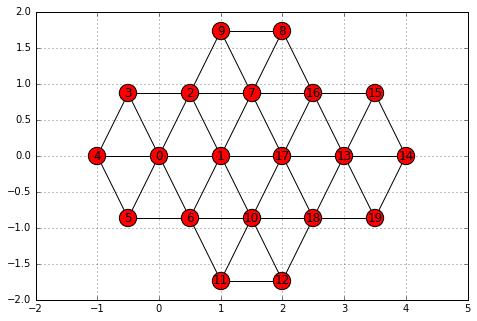

In [21]:
pos = nx.get_node_attributes(G,'pos')
col = nx.get_edge_attributes(G,'color')

nx.draw(G,pos, with_labels=True)
plt.xlim(-2,5)
plt.ylim(-2,2)
plt.axis("on")
plt.grid("on")

plt.show()

In [22]:
col = nx.get_edge_attributes(G,'color')
print(col)

{(1, 2): 'r', (16, 17): 'r', (2, 9): 'r', (12, 18): 'r', (5, 6): 'r', (11, 12): 'r', (17, 18): 'r', (6, 11): 'r', (1, 17): 'r', (15, 16): 'r', (8, 9): 'r', (4, 5): 'r', (2, 3): 'r', (14, 15): 'r', (1, 6): 'r', (8, 16): 'r', (3, 4): 'r', (18, 19): 'r', (14, 19): 'r'}


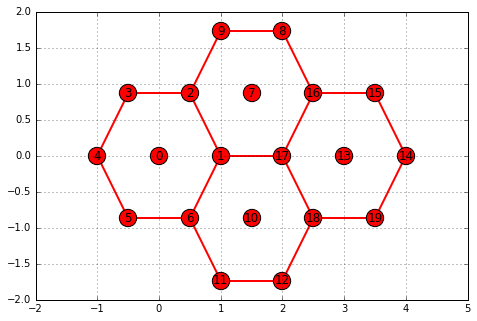

In [23]:
pos = nx.get_node_attributes(G,'pos')
edges,colors = zip(*nx.get_edge_attributes(G,'color').items())
nx.draw(G,pos,edgelist=edges,edge_color=colors,width=2,with_labels=True)
plt.xlim(-2,5)
plt.ylim(-2,2)
plt.axis("on")
plt.grid("on")
plt.show()

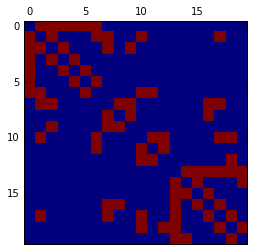

In [24]:
plt.matshow(nx.adjacency_matrix(G).A)
plt.show()

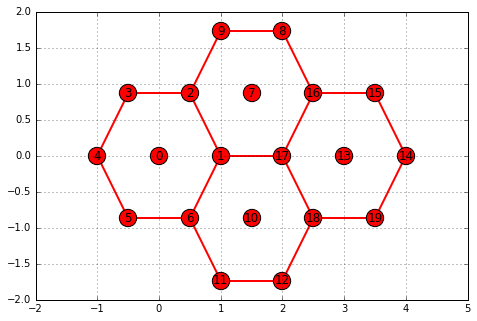

In [39]:
pos = nx.get_node_attributes(G,'pos')
edges,colors = zip(*nx.get_edge_attributes(G,'color').items())
nx.draw(G,pos,edgelist=edges,edge_color=colors,width=2,with_labels=True)
plt.xlim(-2,5)
plt.ylim(-2,2)
plt.axis("on")
plt.grid("on")
plt.show()

In [93]:
for center in G.nodes_iter(data=True):
    if center[1]['center']==True:
        outer = [G.node[element]['pos'] for element in center[1]['boundary']]
        print(CellArea(outer))
        for neighbor in G.neighbors(center[0]):
            inner = [G.node[neighbor]['pos']]
            temp = list(set(G.neighbors(center[0])) & set(G.neighbors(neighbor)))
            inner.append(G.node[temp[0]]['pos'])
            inner.append(center[1]['pos'])
            inner.append(G.node[temp[1]]['pos'])
            print(CellArea(inner))

2.59807621135
0.866025403784
0.866025403784
0.866025403784
0.866025403784
0.866025403784
0.866025403784
2.59807621135
0.866025403784
0.866025403784
0.866025403784
0.866025403784
0.866025403784
0.866025403784
2.59807621135
0.866025403784
0.866025403784
0.866025403784
0.866025403784
0.866025403784
0.866025403784
2.59807621135
0.866025403784
0.866025403784
0.866025403784
0.866025403784
0.866025403784
0.866025403784


In [90]:
0.866025403784*3

2.5980762113519997